In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
        
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
pastel = sns.color_palette('pastel')

**1. Exploratory Data Analysis (EDA)**

Here, we are trying to understand the data.

In [ ]:
train = pd.read_csv("/train.csv")
train.head() 

,Id,CurahHujan,Penguapan,SinarMatahari,KecSemburanAngin,ArahAngin,KecAngin,Kelembapan,Tekanan,Awan,Temperatur9Pagi
0,0,2.2,4.6,1.1,NaN,SBD,26.0,82.0,1020.8,7.0,19.9
1,1,0.0,1.4,6.9,NaN,U,17.0,68.0,1018.6,4.0,8.8
2,2,6.0,2.4,3.6,41.0,STG,11.0,95.0,1027.1,7.0,9.7
3,3,0.2,1.2,7.0,NaN,B,9.0,91.0,1027.4,5.0,2.1
4,4,0.0,3.6,10.3,35.0,STG,15.0,62.0,1035.8,1.0,12.9


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21511 entries, 0 to 21510
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                21511 non-null  int64  
 1   CurahHujan        20477 non-null  float64
 2   Penguapan         20025 non-null  float64
 3   SinarMatahari     19398 non-null  float64
 4   KecSemburanAngin  4357 non-null   float64
 5   ArahAngin         19801 non-null  object 
 6   KecAngin          21510 non-null  float64
 7   Kelembapan        21510 non-null  float64
 8   Tekanan           21510 non-null  float64
 9   Awan              21510 non-null  float64
 10  Temperatur9Pagi   21510 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.8+ MB


In [ ]:
train.tail()

,Id,CurahHujan,Penguapan,SinarMatahari,KecSemburanAngin,ArahAngin,KecAngin,Kelembapan,Tekanan,Awan,Temperatur9Pagi
59405,59405,0.0,4.2,10.9,NaN,U,9.0,76.0,1026.6,0.0,14.4
59406,59406,0.0,4.8,11.1,NaN,BBD,7.0,51.0,1016.9,0.0,22.0
59407,59407,0.0,8.0,11.5,NaN,TTL,24.0,64.0,1014.8,1.0,30.1
59408,59408,0.0,3.6,7.8,NaN,UBL,15.0,97.0,1012.7,8.0,13.2
59409,59409,0.0,1.6,0.4,NaN,U,9.0,68.0,1019.5,7.0,10.3


In [ ]:
train.describe()

,Id,CurahHujan,Penguapan,SinarMatahari,KecSemburanAngin,KecAngin,Kelembapan,Tekanan,Awan,Temperatur9Pagi
count,59410.000000,54332.000000,52302.000000,49274.000000,10156.000000,59410.000000,59410.000000,59410.000000,59410.000000,59410.000000
mean,29704.500000,2.145715,5.496239,7.739159,41.040075,15.688823,65.939623,1016.951437,4.248073,18.225282
std,17150.334083,7.026224,3.699727,3.797508,13.543644,8.334664,18.627505,15.578354,2.796774,6.576026
min,0.000000,0.000000,0.000000,0.000000,11.000000,2.000000,0.000000,216.000000,0.000000,-0.700000
25%,14852.250000,0.000000,2.800000,5.000000,31.000000,9.000000,55.000000,1012.700000,1.000000,13.100000
50%,29704.500000,0.000000,5.000000,8.700000,39.000000,15.000000,67.000000,1017.100000,5.000000,17.800000
75%,44556.750000,0.600000,7.400000,10.700000,48.000000,20.000000,79.000000,1021.800000,7.000000,23.300000
max,59409.000000,206.200000,81.200000,39.000000,124.000000,67.000000,188.000000,1040.400000,8.000000,39.400000


After using .head, .tail, .info, I found that:

- The amount of data is 59410 entries, in which there are 59410 rows and 11 columns, namely Id, CurahHujan, Penguapan, SinarMatahari, KecSemburanAngin, ArahAngin, KecAngin, Kelembapan, Tekanan, Awan, Temperatur9Pagi
- There are three kinds of data types, namely float (9), integer (1), and object (1)
- There are several missing values ​​in the KecSemburanAngin column

Now, we check if the data is normally distributed or skewed.

In [ ]:
train.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Id                   0.000000
CurahHujan           7.416800
Penguapan            2.288488
SinarMatahari       -0.403417
KecSemburanAngin     0.959550
KecAngin             0.938474
Kelembapan          -0.418932
Tekanan            -36.420601
Awan                -0.163318
Temperatur9Pagi      0.106870
dtype: float64


After using .skew, I found that theCurahHujan, Penguapan, KecSemburanAngin, KecAngin, dan Tekanan columns were skewed because the values ​​were greater than 0.5. Meanwhile, the columns SinarMatahari, Kelembapan, Awan, dan Temperatur9Pagi are normally distributed or symmetrical because the value is less than 0.5.

Next, we will try to analyse the data correlation.

Temperatur9Pagi     1.000000
Penguapan           0.592114
SinarMatahari       0.285613
KecSemburanAngin    0.084160
KecAngin            0.054292
CurahHujan          0.016865
Id                  0.002928
Awan               -0.109098
Tekanan            -0.199358
Kelembapan         -0.421647
Name: Temperatur9Pagi, dtype: float64


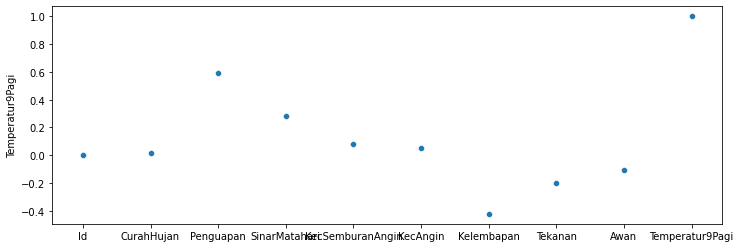

In [ ]:
# Print and sort all column's correlation toward 'Temperatur9Pagi' column
print(train.corr()['Temperatur9Pagi'].sort_values(ascending=False))

# Visualize corr() on `target` column using scatterplot
plt.figure(figsize=(12, 4))
sns.scatterplot(data = train.corr()['Temperatur9Pagi'])
plt.show()

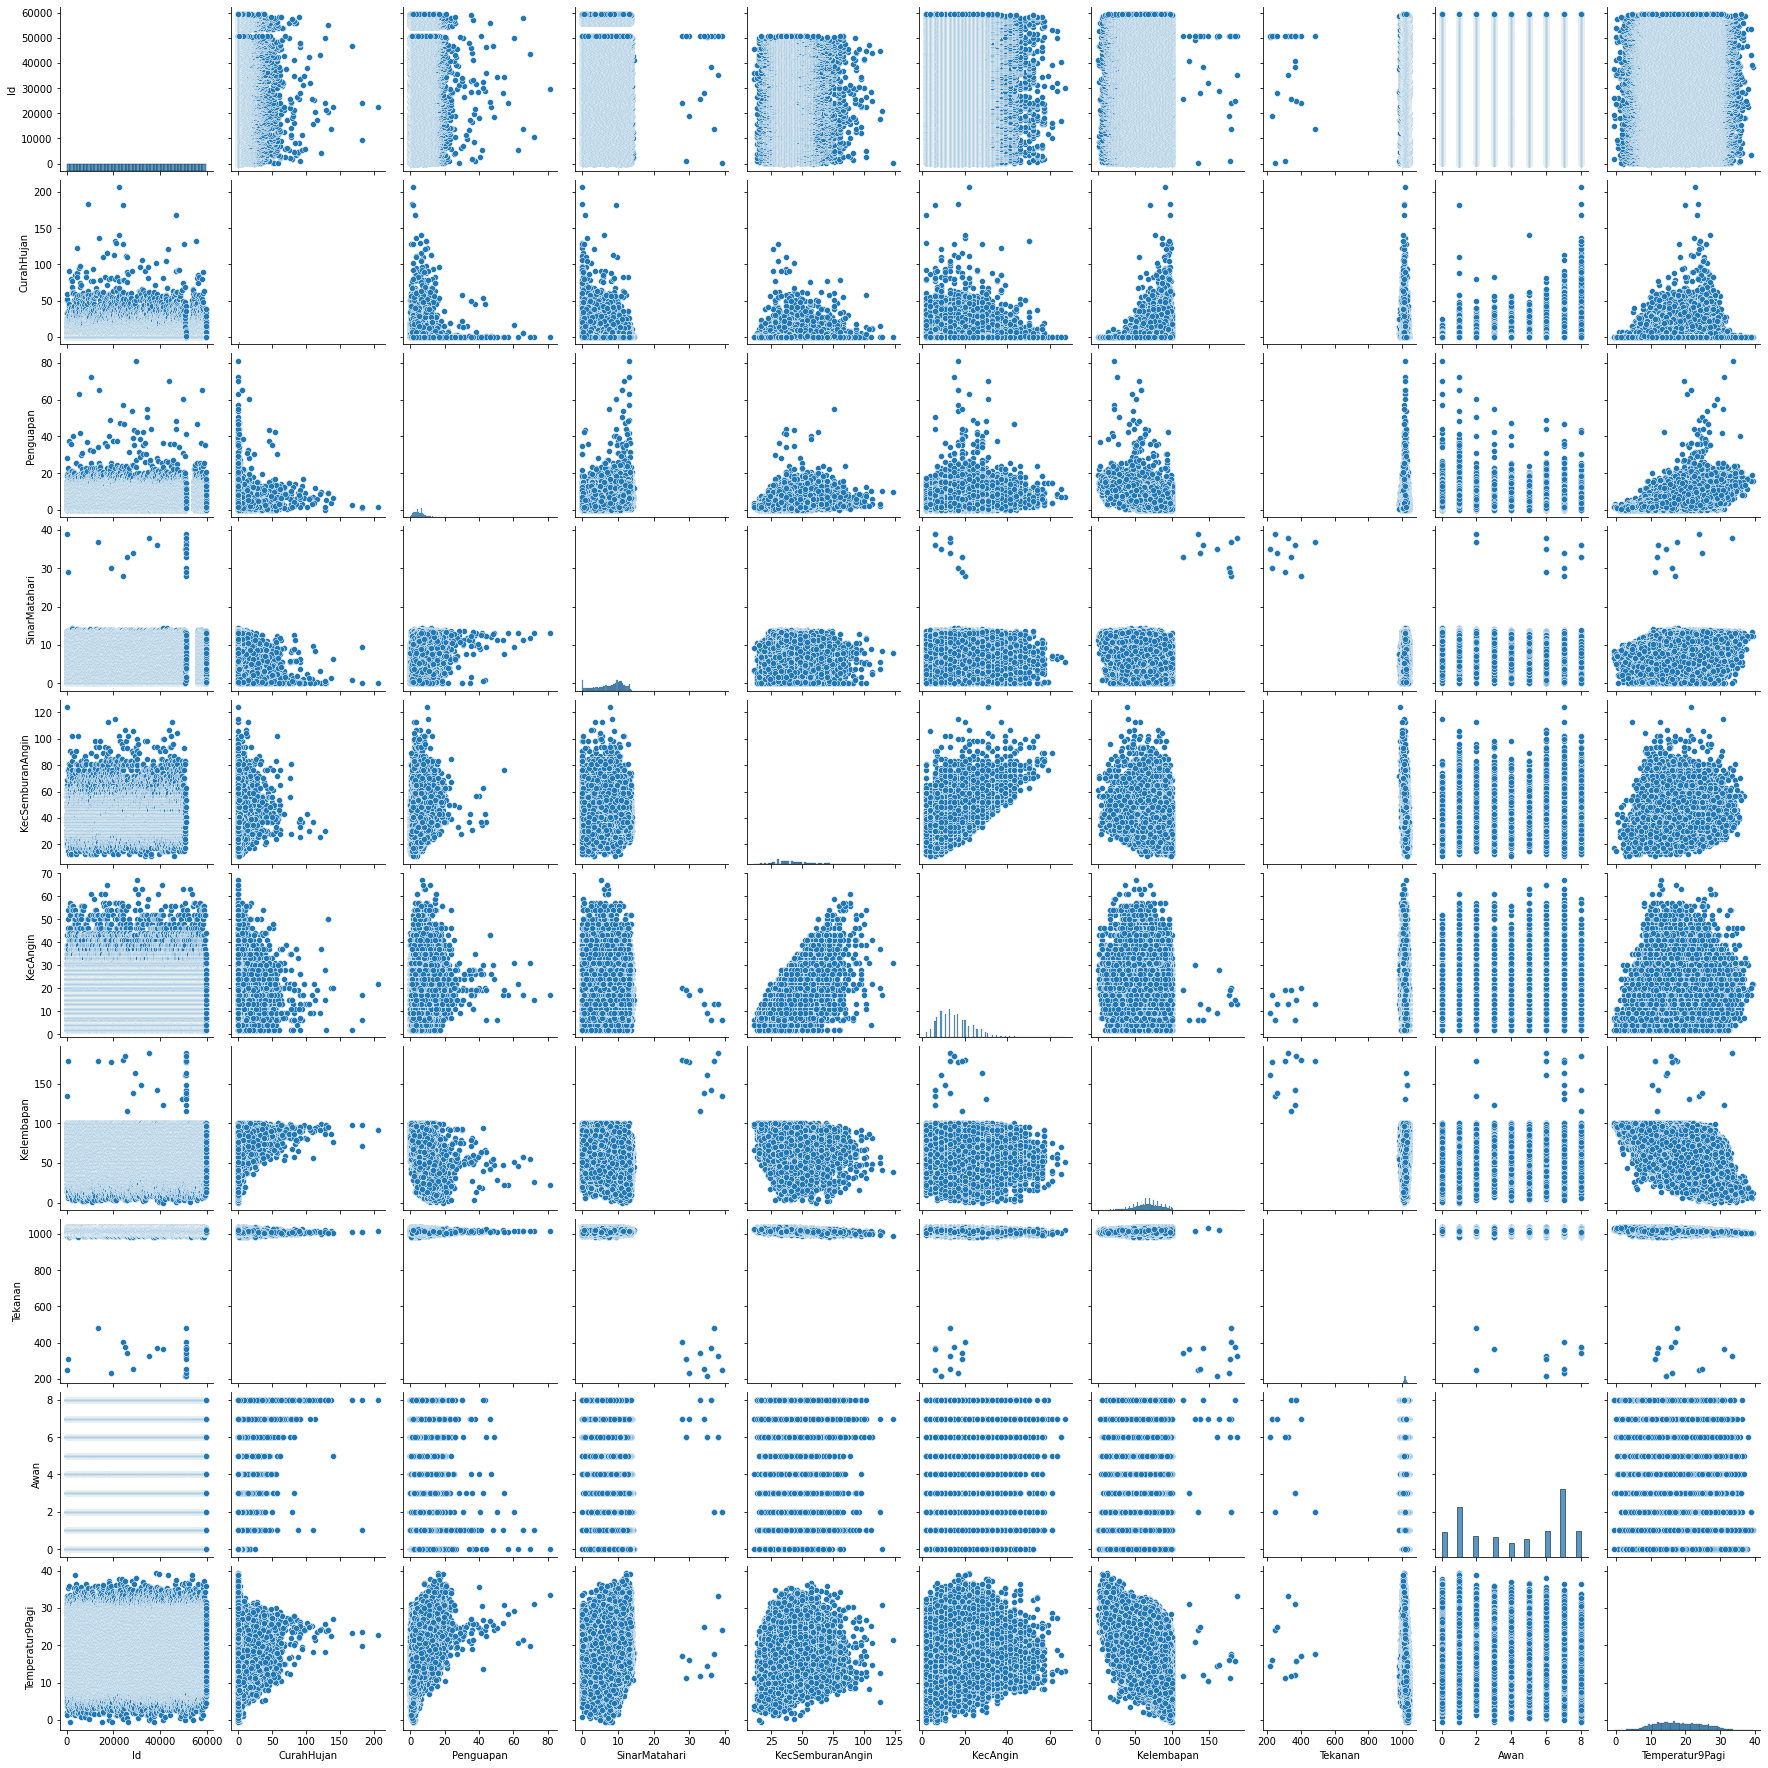

In [ ]:
sns.pairplot(train)

In [ ]:
# Column: `Temperatur9Pagi`'s values
print(train.Temperatur9Pagi.value_counts())

 17.0    360
 14.8    355
 14.7    354
 16.6    351
 16.7    347
        ... 
 37.3      1
 0.1       1
 37.7      1
-0.2       1
 1.5       1
Name: Temperatur9Pagi, Length: 382, dtype: int64


Now, we will find out the correlation between Sinar Matahari and Temperatur.

Text(0, 0.5, 'Temperatur 9 Pagi')

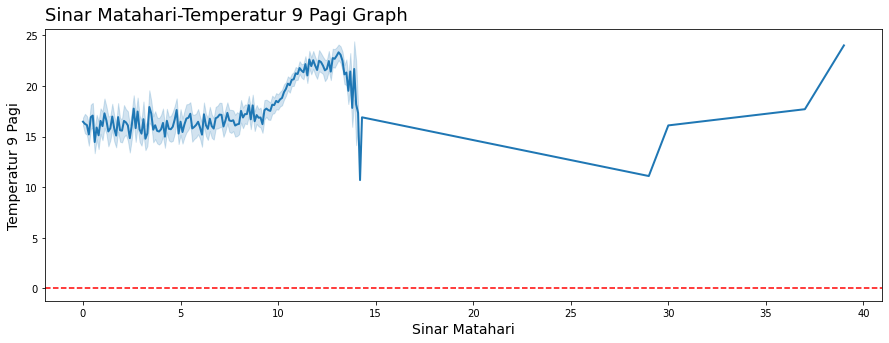

In [ ]:
#hubungan  sinar matahari dan temperature
plt.figure(figsize=(15,5))
sns.lineplot(x = "SinarMatahari",  y = "Temperatur9Pagi", data = train, lw = 2)

plt.axhline(0, ls = "--", color = "red")
plt.title("Sinar Matahari-Temperatur 9 Pagi Graph", fontsize = 18, loc='left', y = 1.01)

plt.xlabel("Sinar Matahari", fontsize=14)
plt.ylabel("Temperatur 9 Pagi", fontsize=14)



If we look at this line graph, we can see that the temperature at 9 am tends to increase when the sunlight level (Sinar Matahari) increases. It is not very obvious when the sunlight level is 0 - 10, but it is very obvious when it is 10-15.

Now, we will find out the correlation between Penguapan and Temperatur.

Text(0, 0.5, 'Temperatur 9 Pagi')

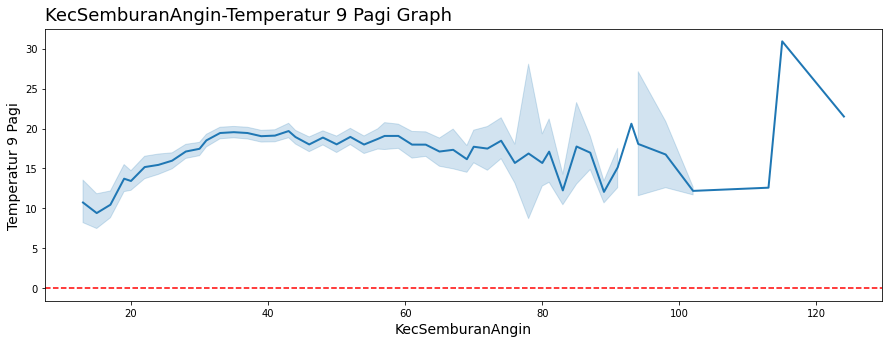

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x="KecSemburanAngin", y="Temperatur9Pagi", data=train, lw=2)

plt.axhline(0, ls = "--", color = "red")
plt.title("KecSemburanAngin-Temperatur 9 Pagi Graph", fontsize = 18, loc='left', y = 1.01)

plt.xlabel("KecSemburanAngin", fontsize=14)
plt.ylabel("Temperatur 9 Pagi", fontsize=14)

Text(0, 0.5, 'Temperatur 9 Pagi')

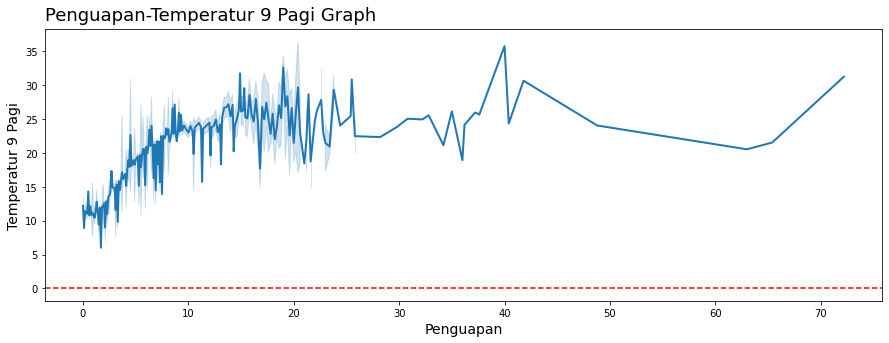

In [ ]:
#hubungan penguapan dan temperature
plt.figure(figsize=(15,5))
sns.lineplot(x = "Penguapan",  y = "Temperatur9Pagi", data = train, lw = 2)

plt.axhline(0, ls = "--", color = "red")
plt.title("Penguapan-Temperatur 9 Pagi Graph", fontsize = 18, loc='left', y = 1.01)

plt.xlabel("Penguapan", fontsize=14)
plt.ylabel("Temperatur 9 Pagi", fontsize=14)

If we look at this line graph, we can see that the temperature at 9 a.m. and evaporation rate (Penguapan) have a positive correlation. The temperature tend to increase as the evaporation rate increase.

Text(0, 0.5, 'Temperatur 9 Pagi')

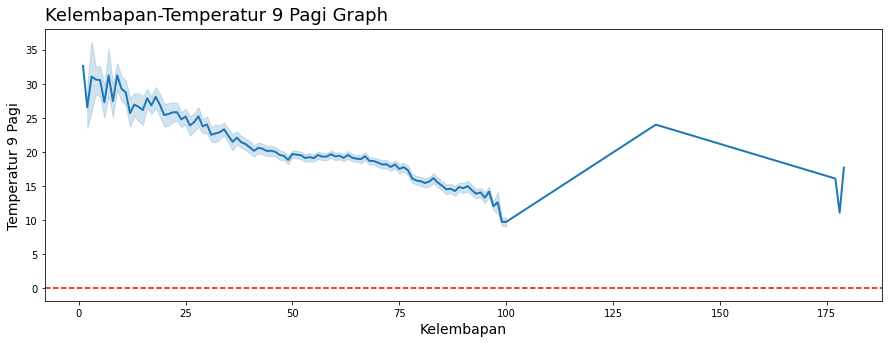

In [ ]:
#hubungan kelembapan dan temperature
plt.figure(figsize=(15,5))
sns.lineplot(x = "Kelembapan",  y = "Temperatur9Pagi", data = train, lw = 2)

plt.axhline(0, ls = "--", color = "red")
plt.title("Kelembapan-Temperatur 9 Pagi Graph", fontsize = 18, loc='left', y = 1.01)

plt.xlabel("Kelembapan", fontsize=14)
plt.ylabel("Temperatur 9 Pagi", fontsize=14)

If we look at this line graph, we can see that the temperature at 9 a.m. and humidity level (Kelembapan) have a negative correlation. The temperature tends to drop as the humidity level increases.

Text(0, 0.5, 'Temperatur 9 Pagi')

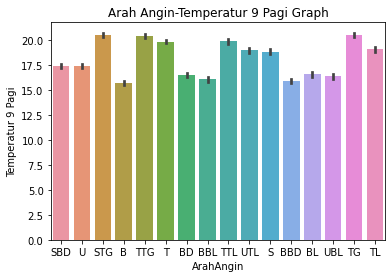

In [ ]:
#hubungan arah angin dan temperature
plt.title("Arah Angin-Temperatur 9 Pagi Graph")

sns.barplot(x=train['ArahAngin'], y=train['Temperatur9Pagi'])

plt.ylabel("Temperatur 9 Pagi")


If we look at this bar graph, we can see that the wind directions (ArahAngin) that cause high temperatures are STG, TTG, and TG.

**2. Pre Processing**

In [ ]:
train.isnull()

,Id,CurahHujan,Penguapan,SinarMatahari,KecSemburanAngin,ArahAngin,KecAngin,Kelembapan,Tekanan,Awan,Temperatur9Pagi
0,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
59405,False,False,False,False,True,False,False,False,False,False,False
59406,False,False,False,False,True,False,False,False,False,False,False
59407,False,False,False,False,True,False,False,False,False,False,False
59408,False,False,False,False,True,False,False,False,False,False,False


After using .isnull, it turns out that the data has missing data.

In [ ]:
train.isnull().sum().sum()

79700

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
KecSemburanAngin,49254,82.905235
SinarMatahari,10136,17.061101
ArahAngin,8124,13.674466
Penguapan,7108,11.964316
CurahHujan,5078,8.547383
Id,0,0.000000
KecAngin,0,0.000000
Kelembapan,0,0.000000
Tekanan,0,0.000000
Awan,0,0.000000


Column yang mempunyai banyak missing data adalah KecSemburanAngin, SinarMatahari, ArahAngin, Penguapan, dan CurahHujan.

In [ ]:
train.dropna(subset = ['KecSemburanAngin', 'SinarMatahari', 'ArahAngin', 'Penguapan', 'CurahHujan'], axis = 0, how = 'any', inplace = True)
train.head()

,Id,CurahHujan,Penguapan,SinarMatahari,KecSemburanAngin,ArahAngin,KecAngin,Kelembapan,Tekanan,Awan,Temperatur9Pagi
2,2,6.0,2.4,3.6,41.0,STG,11.0,95.0,1027.1,7.0,9.7
4,4,0.0,3.6,10.3,35.0,STG,15.0,62.0,1035.8,1.0,12.9
7,7,0.0,2.2,3.3,35.0,U,6.0,83.0,1014.9,8.0,17.4
16,16,23.2,2.4,3.2,59.0,B,31.0,100.0,1004.9,7.0,12.7
19,19,0.0,3.2,1.6,52.0,UTL,19.0,54.0,1015.3,4.0,19.8


In [ ]:
train.isnull().sum().sum()

0

In [ ]:
print(train[train.duplicated()])

Empty DataFrame
Columns: [CurahHujan, Penguapan, SinarMatahari, KecSemburanAngin, KecAngin, Kelembapan, Tekanan, Awan, Temperatur9Pagi, ArahAngin]
Index: []


After using .duplicated, it turns out that the data does not have any duplicated data.

In [ ]:
train.drop(['Id', 'ArahAngin'],axis=1, inplace=True)
train

,CurahHujan,Penguapan,SinarMatahari,KecSemburanAngin,KecAngin,Kelembapan,Tekanan,Awan,Temperatur9Pagi
2,6.0,2.4,3.6,41.0,11.0,95.0,1027.1,7.0,9.7
4,0.0,3.6,10.3,35.0,15.0,62.0,1035.8,1.0,12.9
7,0.0,2.2,3.3,35.0,6.0,83.0,1014.9,8.0,17.4
16,23.2,2.4,3.2,59.0,31.0,100.0,1004.9,7.0,12.7
19,0.0,3.2,1.6,52.0,19.0,54.0,1015.3,4.0,19.8
...,...,...,...,...,...,...,...,...,...
50754,9.0,6.2,11.5,48.0,20.0,73.0,1020.9,3.0,9.7
50755,42.6,7.0,1.6,37.0,9.0,96.0,1015.8,7.0,12.3
50761,0.4,4.2,10.8,54.0,20.0,68.0,1014.9,3.0,19.4
50771,35.4,12.2,11.3,37.0,19.0,61.0,1022.4,7.0,24.7


Here, we are dropping the non-numerical data and the unused data, which are the 'Id' and 'ArahAngin' column.

In [ ]:
from sklearn.model_selection import train_test_split   # To split train val test set
from sklearn.pipeline import Pipeline      # To create pipeline for data transformation
from sklearn.impute import SimpleImputer     # To impute missing values
from sklearn.preprocessing import StandardScaler     # To standardize the data
from sklearn.metrics import accuracy_score 

**Machine Learning Modelling**

In [ ]:
x = train.iloc[:, :-1]
y = train.iloc[:, -1]
x.shape

(10156, 8)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=40)
print(x_train, y_train, x_test, y_test)

       CurahHujan  Penguapan  SinarMatahari  KecSemburanAngin  KecAngin  \
17364         0.2        2.0            7.3              43.0      15.0   
36075         0.0        7.0           11.8              33.0      20.0   
4983          0.0        8.8            8.7              37.0       6.0   
48543         0.6        2.6            9.5              26.0       9.0   
45124         0.0        2.8            5.0              50.0      15.0   
...           ...        ...            ...               ...       ...   
39142         0.0       14.2           12.9              28.0       9.0   
17833         2.0        4.0            8.7              89.0      43.0   
29585         0.0       15.8           10.1              57.0      31.0   
27021         0.0       14.8           10.4              57.0      13.0   
37862         0.0        5.2            6.6              26.0      13.0   

       Kelembapan  Tekanan  Awan  
17364        71.0   1018.7   5.0  
36075        34.0   1020.7   

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([12.779, 26.906, 16.584, ...,  7.233, 15.649, 11.518])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

5.471173890449105

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.3390540588984052

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1.670358008402258

In [ ]:
np.sqrt(mean_absolute_error(y_test, y_pred))

1.2924233085186363

In [ ]:
test = pd.read_csv("/test.csv")
test.head()

,Id,CurahHujan,Penguapan,SinarMatahari,KecSemburanAngin,ArahAngin,KecAngin,Kelembapan,Tekanan,Awan
0,0,0.0,8.2,10.4,43.0,U,26.0,43.0,1012.3,1.0
1,1,6.2,2.8,12.2,65.0,SBD,33.0,59.0,1012.8,3.0
2,2,0.0,1.0,0.0,22.0,U,11.0,86.0,1032.1,7.0
3,3,6.1,3.1,2.1,43.0,BBD,24.0,97.0,1026.9,8.0
4,4,0.0,3.0,10.2,30.0,BBL,7.0,50.0,1016.9,1.0


In [ ]:
test.isnull().sum().sum()

0

In [ ]:
test.drop(['ArahAngin'],axis=1, inplace=True)
test

,Id,CurahHujan,Penguapan,SinarMatahari,KecSemburanAngin,KecAngin,Kelembapan,Tekanan,Awan
0,0,0.0,8.2,10.4,43.0,26.0,43.0,1012.3,1.0
1,1,6.2,2.8,12.2,65.0,33.0,59.0,1012.8,3.0
2,2,0.0,1.0,0.0,22.0,11.0,86.0,1032.1,7.0
3,3,6.1,3.1,2.1,43.0,24.0,97.0,1026.9,8.0
4,4,0.0,3.0,10.2,30.0,7.0,50.0,1016.9,1.0
...,...,...,...,...,...,...,...,...,...
5637,5637,0.0,4.8,10.0,46.0,24.0,27.0,1018.1,3.0
5638,5638,0.0,6.6,12.8,35.0,19.0,76.0,1021.8,1.0
5639,5639,0.0,7.4,9.0,35.0,17.0,56.0,1016.2,3.0
5640,5640,0.0,3.8,10.1,41.0,17.0,53.0,1014.7,1.0


In [ ]:
predictor = ['CurahHujan', 'Penguapan', 'SinarMatahari', 'KecSemburanAngin', 'KecAngin', 'Kelembapan', 'Tekanan', 'Awan' ]
test_x = test[predictor]

predicted_temperature = model.predict(test_x)
print(predicted_temperature)

[24.64  16.739  8.713 ... 24.773 15.746 11.272]
